## Learning Objectives

We will learn how to apply visualizations to a real dataset using them to uncover potential problems as well as understand salient features. And we will solidify our belief in their importance.

## Back to billions

So we are going to be checking out our data a bit more now. We will actively show how we can check for outliers in our data, understand the distribution of certain features and how they relate to each other. So let's get started.

Again we start off by cleaning the data as we did in the previous class:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/billionaires.csv')

del df['was founder']
del df['inherited']
del df['from emerging']

df.age.replace(-1, np.NaN, inplace=True)
df.founded.replace(0, np.NaN, inplace=True)
df.gdp.replace(0, np.NaN, inplace=True)

## Single feature

Now let's go ahead and check out one of our features: billions. Let's understand what the data distribution looks like using seaborn. First we import it:

/Users/lizchan/data-science-foundations/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


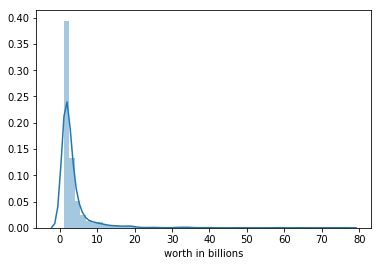

In [3]:
%matplotlib inline
# The above line is to show plots inline in a notebook

import seaborn as sns

sns.distplot(df['worth in billions'])

We are looking at the distribution represented in two ways. One is a histogram that buckets the data and then displays how much each bucket contains. The second is a KDE (we will go over this specifically in the future) that gives us a smooth representation of how much data is where. Notice that the y axis here is in fraction of the total data.

This data is extremely right tailed (actually a common artifact). Sometimes to get a better picture of this type of distribution, we can look at a visualization of a **log transform** of the data:

/Users/lizchan/data-science-foundations/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


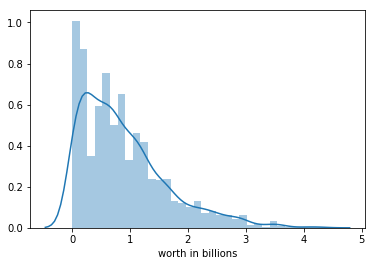

In [4]:
sns.distplot(np.log(df['worth in billions']))

Another very common way to visualize single features is using a box plot:

In [24]:
sns.boxplot(np.log(df['worth in billions']))

SyntaxError: invalid syntax (<ipython-input-24-b44be094a773>, line 2)

In [ ]:
sns.boxplot(np.log(df['worth in billions']))

This shows you where the majority of your data is and it gives you the most relevant points of your data: the median, the quartiles, and the outliers.

There are more complex plots that can even tell you more, like the letter value plot, but the above generally suffices.

## Quantitative and Qualitative data

Often you want to look at how different quantitative values change as specific qualitative values change. For example we can see the data distributions of worth in billions by wealth types:

/Users/lizchan/data-science-foundations/env/lib/python3.6/site-packages/seaborn/categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 

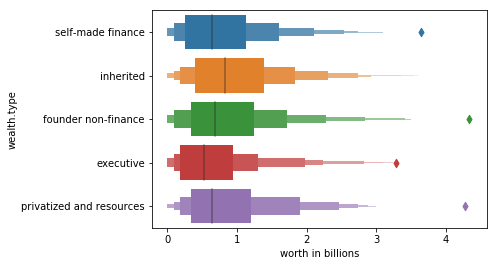

In [6]:
sns.lvplot(x=np.log(df['worth in billions']), y='wealth.type', data=df)
# histogram w/ a median
# Violin plot with bins

This can give us a sense of which factors or groups are important and how they effect the distribution of data (more information than just correlation would give you).

## Multiple Factors

While the above will work for visualizing one numeric factor under multiple qualitative conditions, there are other tools that can help to visualize multiple quantitative factors. 

We can of course visualize their heat map of correlations:

/Users/lizchan/data-science-foundations/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  
/Users/lizchan/data-science-foundations/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  # Remove the CWD from sys.path while we load stuff.


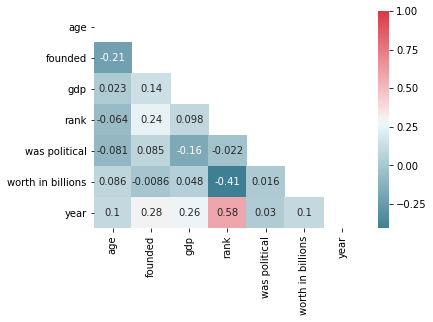

In [22]:
# Compute the correlation matrix
corr = df.corr().dropna((0, 1))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr().dropna((0, 1), how='all'), mask=mask, cmap=cmap, annot=True) #annot allows to see data labels

This will tell us which values relate at a close glance. For example it seems that: was political is inversily related to gdp. Thus in lower gdp nations there is a larger chance to have a political billionaire. Makes sense. (If you are interested in learning more about heatmaps check out [this](https://www.youtube.com/watch?v=2gUzVX2yfWA))

In addition to just a heat map we can plot two distributions against each other:

/Users/lizchan/data-science-foundations/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


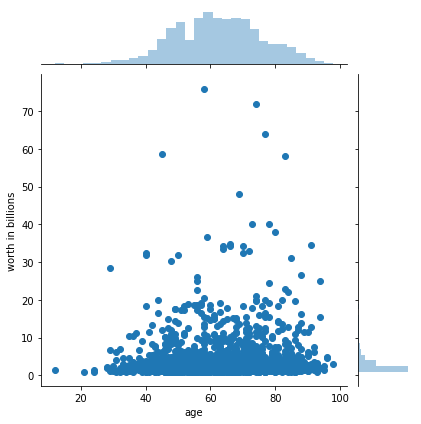

In [8]:
sns.jointplot(x='age', y='worth in billions', data=df)

We get a good sense of how these two variables are distributed and how they are correlated.

The final plot that I will show you can sum up a great deal about your data in a single blow, and this is called a pair plot:

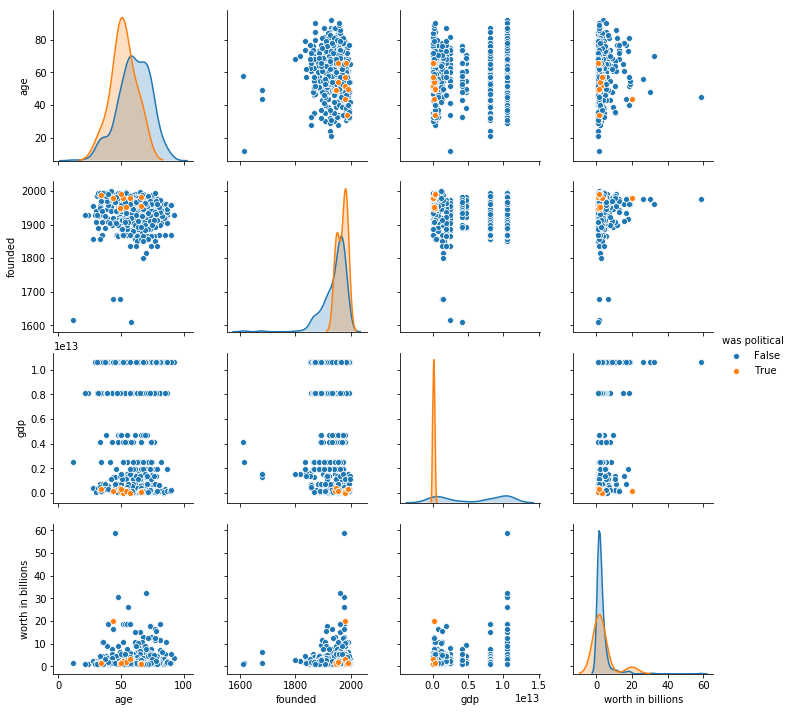

In [9]:
sns.pairplot(df.select_dtypes(['float64']).join(df['was political']).dropna(), 'was political', vars=df.select_dtypes(['float64']).columns)

We are able to see how each variable relates to the others. We are able to see the histograms of the variables. And we are able to see how conditioning on specific qualitative variables effects the relationship between the others.

## Now why

Hopefully you are able to see how these visualizations characterize a dataset. We see how the columns relate to each other and how the data is distributed in each column. For us we now understand the makeup of billionaires, where they got their money from, what is their spectrum of wealth and when their companies were founded. 

Next time we are going to be taking a little bit of a break and looking at random variables. We will make some silly random variables and then a useful one. Then in the lesson after we will show you how to go about using these random variables.


## Learning Objectives

We will learn how to apply visualizations to a real dataset using them to uncover potential problems as well as understand salient features. And we will solidify our belief in their importance.

## Comprehension Questions

1.	What can you tell me about the distribution of wealth about billionaires?
    1. right skewed
    1. Mostly between 1 - 10 billion
2.	What is a good way to view/study right tailed data?
    1. seaborn distplot
    1. log transform the table reduces the skew
    1. Contextual knowledge
3.	What is the median wealth of billionaires?
    1. 2
4.	What other correlations are interesting from the heat map?
    1. Rank and Year are positively correlated; longer a billionaire means lower in rank
    1. Rank and worth in billions are negatively correlated
    1. As time went on, founders are younger - negatively correlated
5.	Are older people likely to have more money?
    1. pearson coefficient is .86; very slight correlation
6.	What are some problems this dataset is likely to have that we have yet to talk about
    1. Only 3 years worth of data
    1. Data is not cleaned

In [11]:
df.describe()

,age,founded,gdp,rank,worth in billions,year
count,2229.000000,2574.000000,9.490000e+02,2614.000000,2614.000000,2614.000000
mean,62.576492,1954.621989,4.872956e+12,599.672533,3.531943,2008.411630
std,13.134715,43.189003,4.420257e+12,467.885695,5.088813,7.483598
min,12.000000,1610.000000,2.491801e+09,1.000000,1.000000,1996.000000
25%,53.000000,1938.250000,3.970000e+11,215.000000,1.400000,2001.000000
50%,62.000000,1963.000000,2.500000e+12,430.000000,2.000000,2014.000000
75%,72.000000,1985.000000,1.060000e+13,988.000000,3.500000,2014.000000
max,98.000000,2012.000000,1.060000e+13,1565.000000,76.000000,2014.000000


In [13]:
df['relationship'].unique()

array(['founder', 'relation', 'chairman', nan, 'owner',
       'Chairman and Chief Executive Officer', 'investor', 'president',
       'founder/chairman', 'founder/CEO', 'relation and chairman', 'CEO',
       'Relation', 'founder/relation', 'former chairman and CEO',
       'investor and  CEO', 'vice-chairman',
       "head of Microsoft's application software group", 'chariman',
       'former CEO', 'investor ', 'founder CEO owner', 'employee',
       'co-chairman', 'ceo', 'lawer', 'founder and chairman',
       'leadership', 'Chairman', 'general director', 'founder and CEO',
       'founder and ceo', 'supervisory board or directors', 'partner',
       'owner and former CEO', 'Honorary President for Life',
       'co-director of zinc, copper and lead', 'Chief Executive',
       'Exectuitve Director', 'founder and chairwoman',
       'relation/vice chairman', 'founder, chairman, ceo',
       'deputy chairman', 'director', 'investor/founder',
       'executive chairman', 'inventor', 'own

In [14]:
df['company.type'].unique()

array(['new', 'privatization', 'subsidiary', ' new', 'aquired', nan,
       'franchise', 'new/aquired', 'privatized', 'acquired', 'new ',
       'state owned enterprise', 'merger', ' acquired', 'neew',
       'new, privitization', 'franchise rights', 'joint venture',
       'new division'], dtype=object)

In [16]:
df.columns

Index(['age', 'category', 'citizenship', 'company.name', 'company.type',
       'country code', 'founded', 'gdp', 'gender', 'industry', 'name', 'rank',
       'region', 'relationship', 'sector', 'was political', 'wealth.type',
       'worth in billions', 'year'],
      dtype='object')

In [17]:
df['category'].unique()

array(['Financial', 'Non-Traded Sectors', 'New Sectors', 'Traded Sectors',
       'Resource Related', '0', 'Finance', 'Trucking', nan, 'energy'],
      dtype=object)

In [21]:
df['region'].unique()

array(['Middle East/North Africa', 'North America', 'Latin America',
       'Europe', 'East Asia', 'Sub-Saharan Africa', 'South Asia', '0'],
      dtype=object)